# MNIST Digits Classification with Logistic Regression

Yes, this is another MNIST classification problem performed on logistic regression, but this time we will not depend on sklearn to provide us with the dataset. We will be working with real image data files extracted from the  official site.

We will also be extending our model to work with our very own dataset, i.e. images of digits taken from cameras. 

**Note: This code is the solution for the DataHack digit classification problem and therefore, we will only be able to check the test accuracy through their submission page.**

### Let's begin by importing all the required libraries

In [24]:
import os
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Getting the files ready

In [25]:
train_df = pd.read_csv('train.csv')
y_train = train_df['label']

### Getting the training images

In [13]:
def get_train_images(PATH, num_imgs):
    images = []
    
    for i in range(num_imgs):
        img_path = os.path.join(PATH, train_df.iloc[i,0])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)
    
    data = np.asarray(images)
    return data

def get_test_images(PATH, num_imgs):
    images = []
    
    for i in range(num_imgs):
        img_path = os.path.join(PATH, test_df.iloc[i,0])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)
    
    data = np.asarray(images)
    return data

In [5]:
X_train = get_train_images('./Images/train/', len(y_train))

### Looking at some images

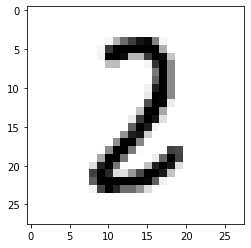

In [6]:
n = random.randint(0,len(y_train))
plt.imshow(X_train[n], cmap=plt.cm.binary)

### Some Data Preprocessing

In [7]:
#Flattening out the images to feed to the LR model.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Getting our model ready

In [9]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

/home/prateek-ml/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [10]:
train_score = model.score(X_train, y_train)
print("Training score: ", train_score)

Training score:  0.9464897959183673


### Getting the test images

In [14]:
test_df = pd.read_csv('test.csv')
X_test = get_test_images('./Images/test/', len(test_df))

### Looking at some test images

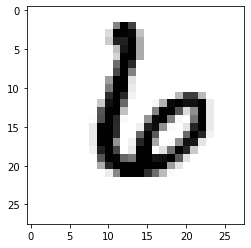

In [19]:
n = random.randint(0,len(test_df))
plt.imshow(X_test[n], cmap=plt.cm.binary)

In [22]:
## Flattening test images and scale-transforming them
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test = sc.transform(X_test)

### Predicting

In [23]:
predictions = model.predict(X_test)
test_df['label'] = predictions

test_df.to_csv('submission.csv', index=False)